In [ ]:
import torch

In [ ]:
# 데이터

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2 , 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_un = 0.1 * t_u

# 데이터셋 나누기
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples) # 전체 데이터의 20% , 여기서는 2

shuffled_indices = torch.randperm(n_samples) # randperm : 0~n 사이의 정수를 무작위로 섞어서 텐서 만들기

train_indices = shuffled_indices[n_val:] # 2,3,4,5,6,7,8,9 10
val_indices = shuffled_indices[:n_val] # 0, 1

train_indices, val_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

def model(t_u, w,b):
 return w*t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) **2
    return squared_diffs.mean()

# Chapter 6 신경망을 활용한 데이터 fitting

# 6.1 인공 뉴런

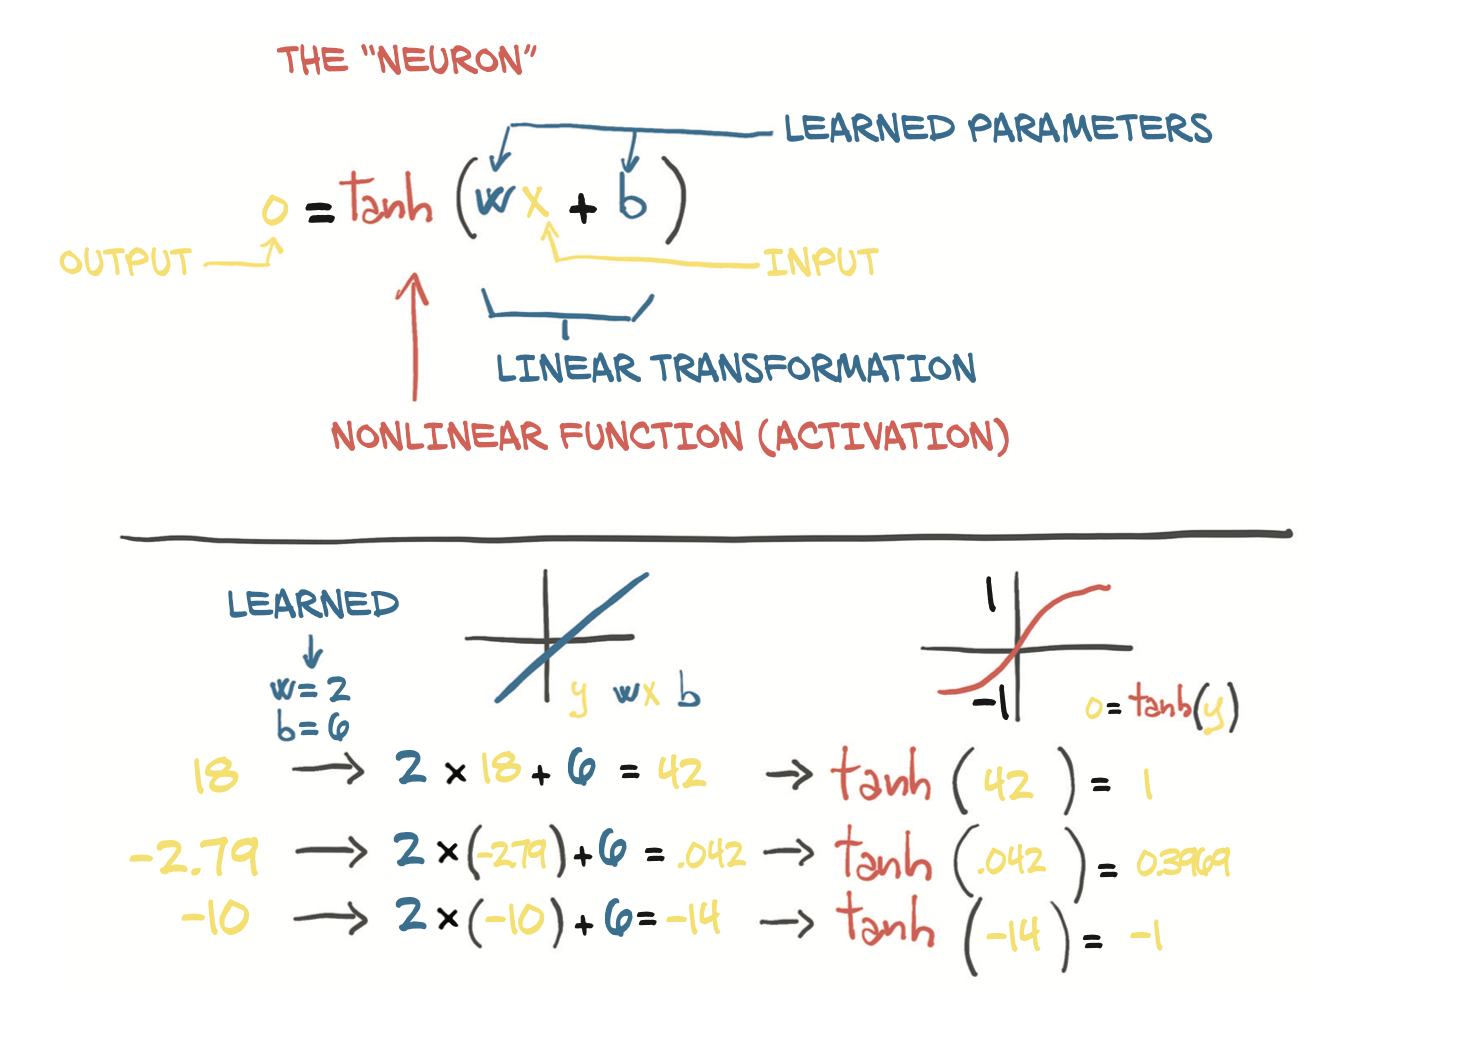

### 6.1.1 다중 계층 신경망 합성하기

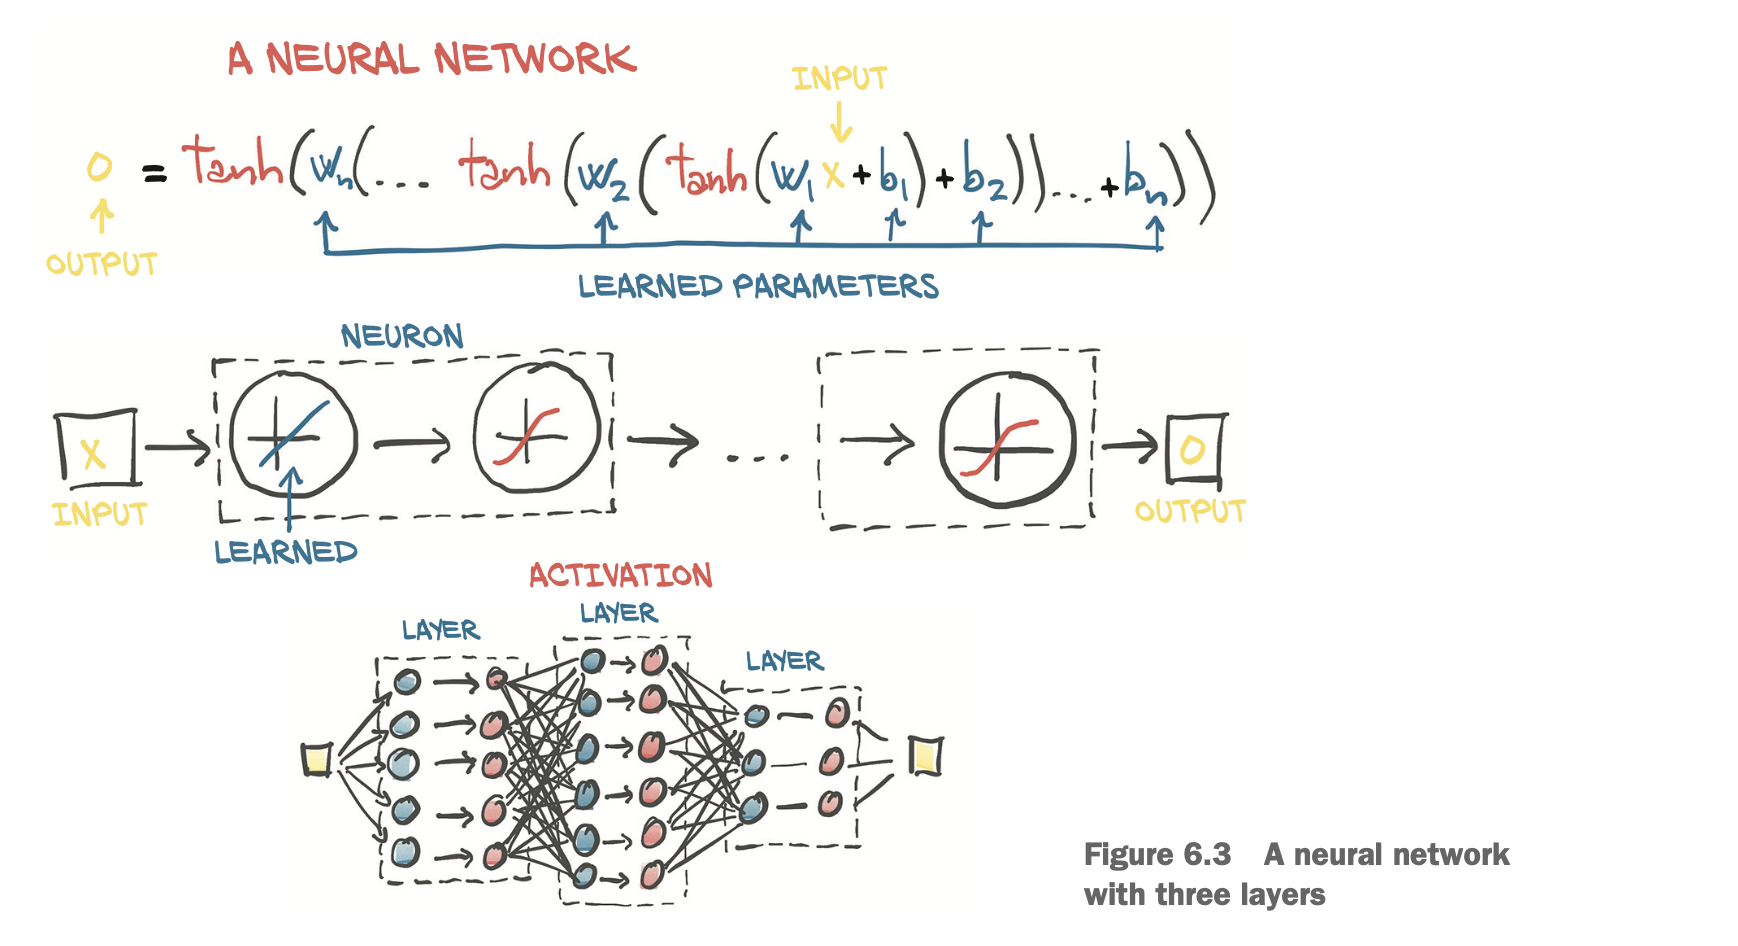

### 6.1.2 오차 함수

### 6.1.3 우리에게 필요한건 활성함수

- 활성 함수의 역할
1. 모델 내부에서 출력 함수가 값마다 다른 기울기를 가지도록 만들어준다.
    - 어떻게 가능?
    - 활성함수가 비선형이라서
    - ex 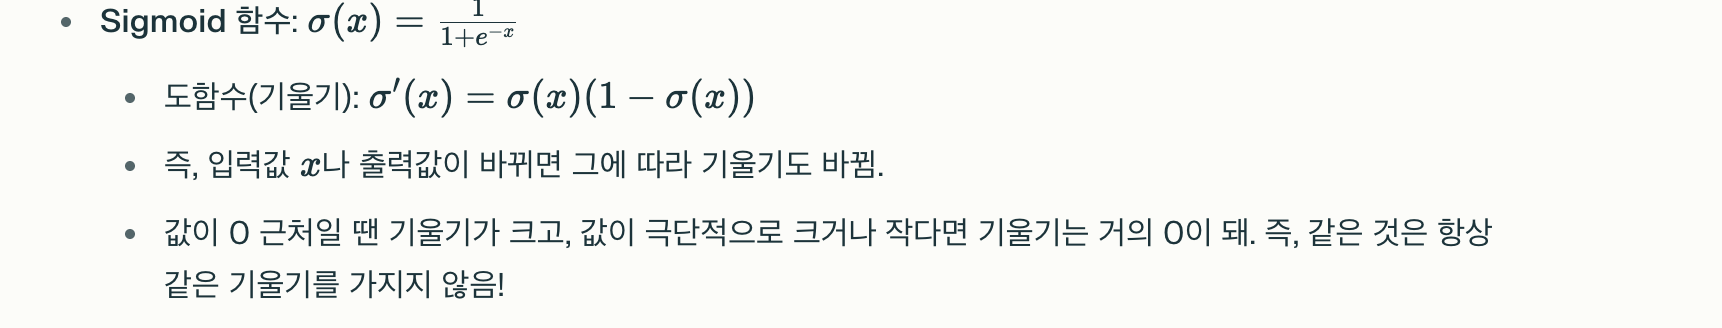
2. 신경망의 마지막 계층은 이전의 선형 연산 출력을 주어진 범위로 모으는 역할을 한다.

In [ ]:
'''
각 그림에 똘똘한 댕댕이 점수를 매긴다고 가정하자.
리트리버와 스패니얼은 높은 점수를 얻지만, 비행기나 쓰레기차는 낮은 점수를 얻는다. 곰 사진도 쓰레기차보다는 높지만 낮은 점수를 얻어야한다.

여기서 "높은 점수"가 어느 정도인지 정의해야한다.
10점 만점으로 정의해도, 모델의 출력값은 특정 범위로 제한되지 않아서 11점을 넘을 수 있다.
'''

# 출력 범위 제한
# 출력 범위 줄이기

import math
print(math.tanh(-2.2)) # 쓰레기 차
print(math.tanh(0.1)) # 곰
print(math.tanh(2.5)) # 똘똘한 댕댕이

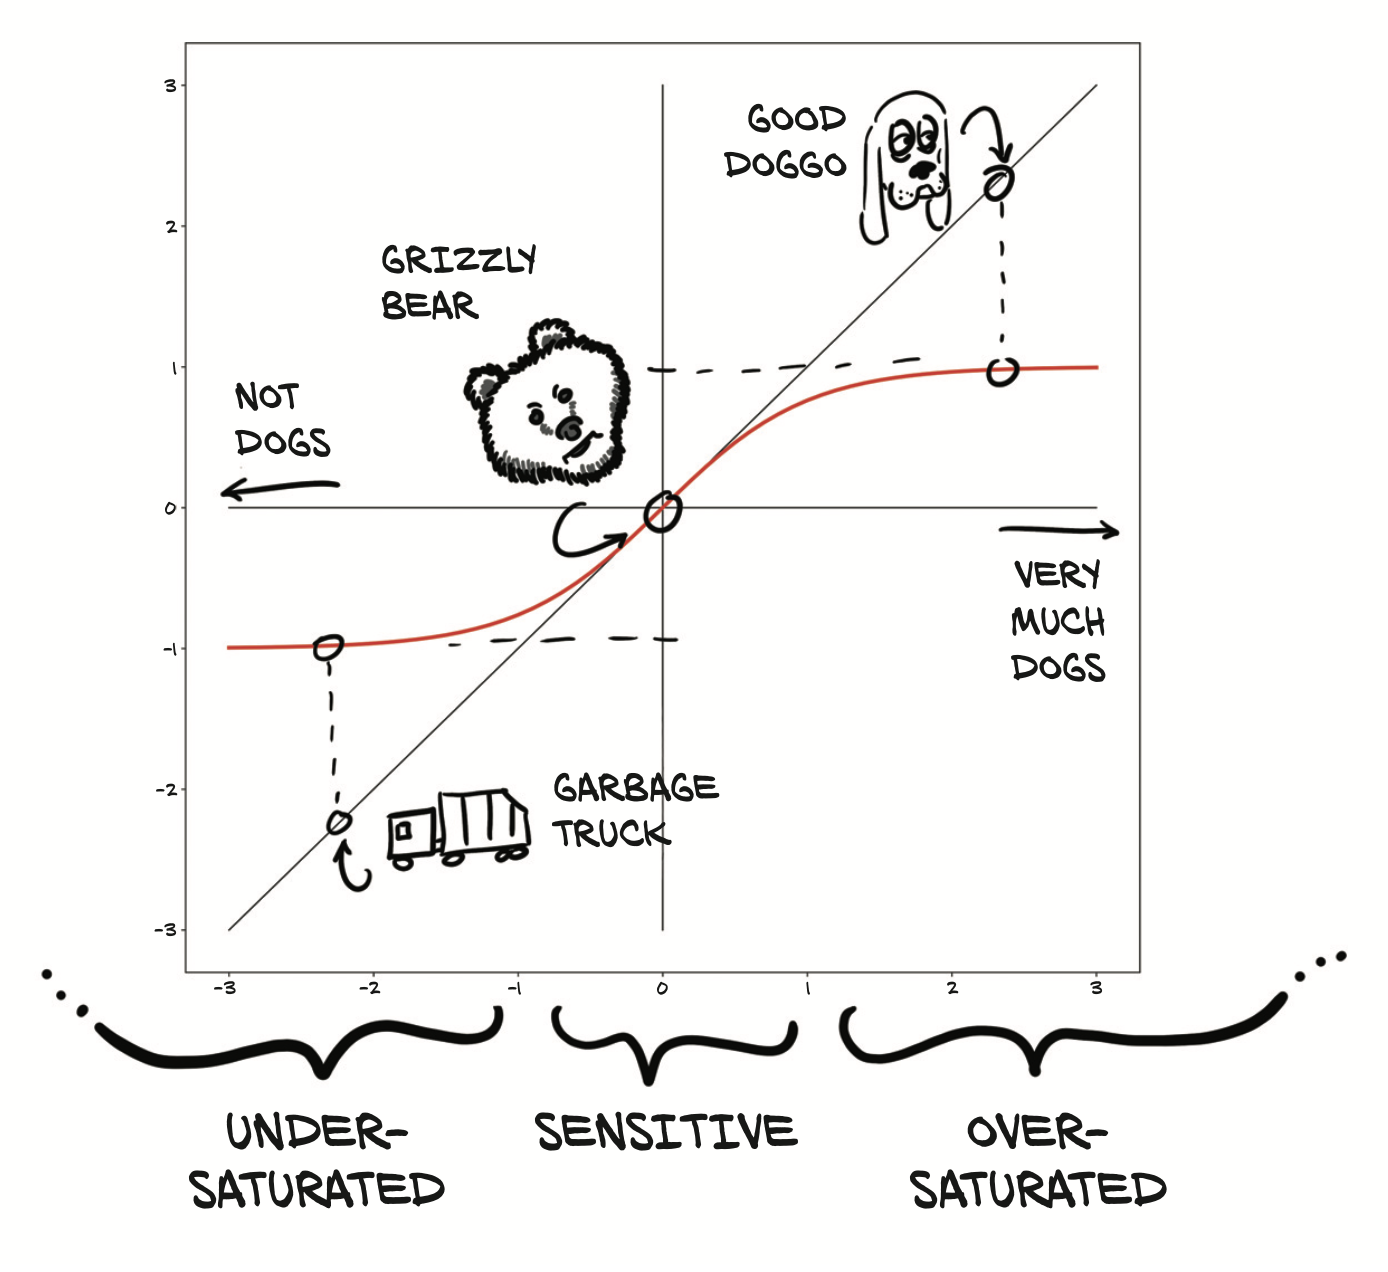

### 6.2.1 forward 대신 __call__ 사용하기

### 6.2.2 다시 선형 모델로

In [ ]:
import torch.nn as nn

linear_model = nn.Linear(1,1)

# 배치 입력 만들기
x = torch.ones(10,1)
linear_model(x)

# 배치 최적화
# 온도계 데이터로 돌아가보자
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # 실제 온도
t_u = [35.7, 55.9, 58.2 , 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # 온도계로 측정한 값

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

# Data splitting was already done in a previous cell, so we can remove it here
# t_un = 0.1 * t_u
# n_samples = t_u.shape[0]
# n_val = int(0.2 * n_samples)
# shuffled_indices = torch.randperm(n_samples)
# train_indices = shuffled_indices[n_val:]
# val_indices = shuffled_indices[:n_val]
# train_t_u = t_u[train_indices]
# train_t_c = t_c[train_indices]
# val_t_u = t_u[val_indices]
# val_t_c = t_c[val_indices]
# train_t_un = 0.1 * train_t_u
# val_t_un = 0.1 * val_t_u

linear_model = nn.Linear(1,1)
optimizer = torch.optim.SGD(
    linear_model.parameters(),
    lr = 1e-2
)

list(linear_model.parameters())

# 이 파라미터들은 경사하강으로 최적화된다. requires_grad= True를 기본적으로 가진다.
# training_loss.backward가 호출되면 옵티마이저에 전달된 파라미터의 grad가 그래프의 말단 노드들에 누적된다.

def training_loop(n_epochs, optimizer , model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):

        t_p_train = model(t_u_train) # Use train_t_un here
        loss_train = loss_fn(t_p_train , t_c_train)

        t_p_val = model(t_u_val) # Use val_t_un here
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward() # 검증 데이터로는 학습하면 안되므로 val_loss.backward()는 없다.
        optimizer.step()

        if epoch ==1 or epoch % 1000 ==0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f},' f"Validation loss {loss_val.item():.4f}")


linear_model = nn.Linear(1,1)

optimizer = torch.optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs= 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un, # Pass train_t_un
    t_u_val = val_t_un,   # Pass val_t_un
    t_c_train = train_t_c,
    t_c_val = val_t_c,
)

print()
print(linear_model.weight)
print(linear_model.bias)

### RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x9 and 1x1)


### 6.3.1 선형 모델 대체하기

In [ ]:
# 선형 모듈 뒤에 활성 함수를 달고 다른 선형 모듈에 연결하자

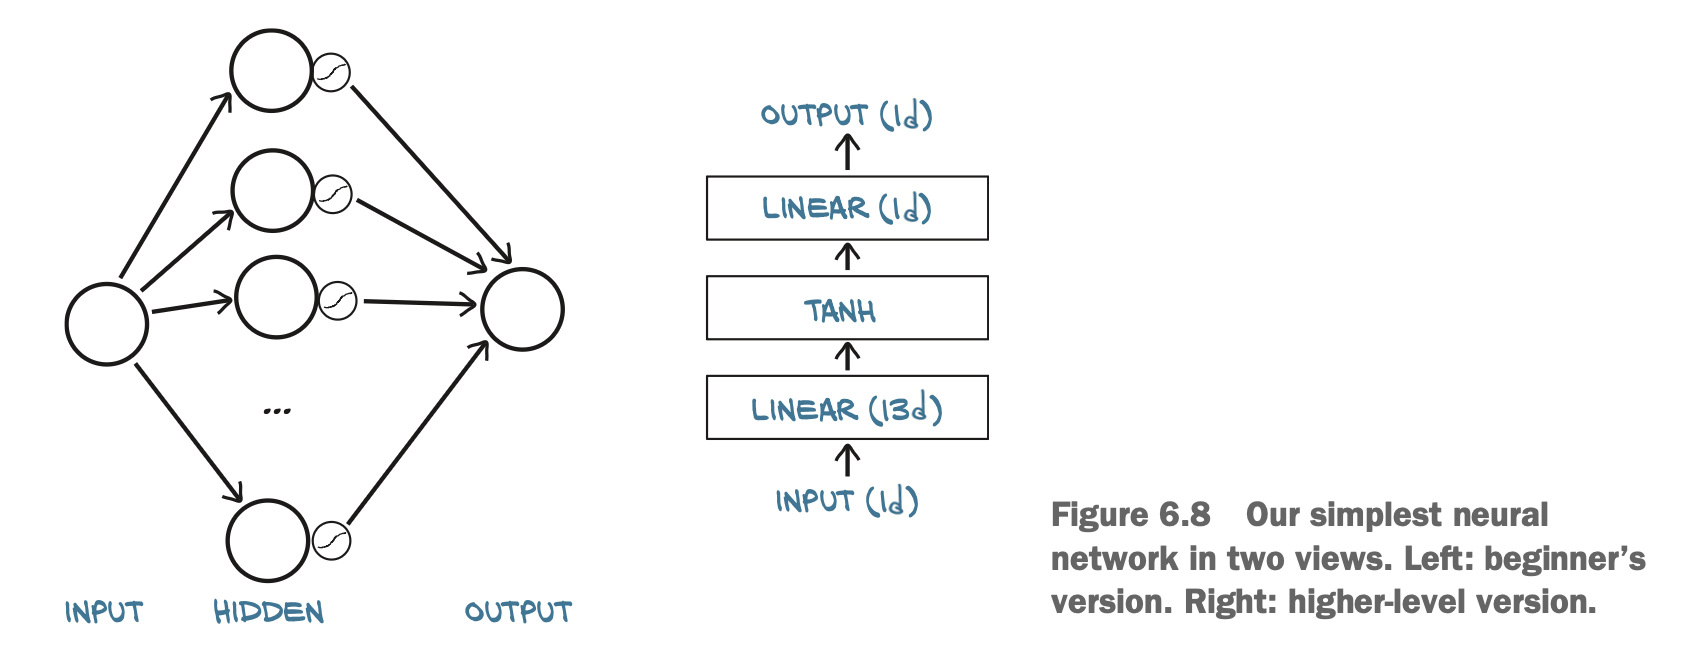

In [ ]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1)
)
seq_model

'''
Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

모델은 한 개의 입력 피처로부터 13개의 은닉된 피처로 펼쳐지며,
결괏값을 tanh 활성함수로 넘겨서 결과로 나온 13개의 숫자를 하나의 출력 피처로 만들기 위해 선형적으로 결합한다.
'''

In [ ]:
[param.shape for param in seq_model.parameters()]

# for name, param in seq_model.named_parameters():
#     print(name, param.shape)

from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,13)),
    ('tanh', nn.Tanh()),
    ('output_linear', nn.Linear(13,1))
]))


for name, param in seq_model.named_parameters():
    print(name, param.shape)

seq_model.output_linear.bias

# 만약 은닉층의 선형 영역에서 weight의 기울기를 출력하고 싶다고 가정하자.
# 새로운 신경망 모델을 위한 훈련 루프를 돌리고 마지막 에포크후에 만들어진 기울기를 보면 된다.

optimizer = torch.optim.SGD(seq_model.parameters(), lr = 1e-3)

training_loop(
    n_epochs= 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un, # Pass train_t_un
    t_u_val = val_t_un,   # Pass val_t_un
    t_c_train = train_t_c,
    t_c_val = val_t_c,
)


print('output', seq_model(val_t_un))
print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)

### 6.3.3 선형 모델과 비교하기

In [ ]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi = 600)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy, seq_model(0.1 * t_u).detach().numpy(),'kx')